In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [96]:
df=pd.read_csv("Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [97]:
df.shape

(128975, 24)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [99]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [100]:
df['Unnamed: 22'].value_counts()

Unnamed: 22
False    79925
Name: count, dtype: int64

In [101]:
df.drop(['index','promotion-ids','Unnamed: 22'],axis=1,inplace=True)

In [102]:
df['fulfilled-by'].value_counts()

fulfilled-by
Easy Ship    39277
Name: count, dtype: int64

In [103]:
df['fulfilled-by'].fillna('Not An Easy Ship',axis=0,inplace=True)

In [104]:
df['Courier Status'].fillna('Not Mentioned',axis=0,inplace=True)

In [105]:
df['Courier Status'].value_counts()

Courier Status
Shipped          109487
Not Mentioned      6872
Unshipped          6681
Cancelled          5935
Name: count, dtype: int64

In [106]:
df['currency'].fillna('INR',axis=0,inplace=True)

In [107]:
df['Amount'].fillna(df['Amount'].mean(),axis=0,inplace=True)

In [108]:
df['ship-city'].fillna('Not Mentioned',axis=0,inplace=True)
df['ship-state'].fillna('Not Mentioned',axis=0,inplace=True)
df['ship-postal-code'].fillna('Not Mentioned',axis=0,inplace=True)
df['ship-country'].fillna('Not Mentioned',axis=0,inplace=True)

In [109]:
df.isnull().sum().sum()

0

## DATA BEEN PRE-PROCESSED SUCCESSFULLY

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      128975 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            128975 non-null  object 
 14  Amount              128975 non-null  float64
 15  ship-city           128975 non-nul

In [111]:
# We need to take the data attributes which is useful for Analysis.

In [112]:
df.describe(include=[int,float])

,Qty,Amount
count,128975.000000,128975.000000
mean,0.904431,648.561465
std,0.313354,272.581240
min,0.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,635.000000
75%,1.000000,771.000000
max,15.000000,5584.000000


In [113]:
# From the above Table we can able to understand that avg sales amount is 650 Rupees and max of 5585 Rupees.
# An avg Qty purchased is 1 and max of 15.

In [114]:
df['Date']=pd.to_datetime(df['Date'])

In [115]:
df['Month']=pd.DatetimeIndex(df['Date']).month

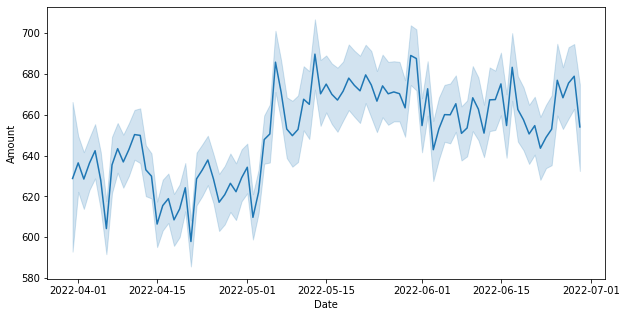

In [116]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Date',y='Amount')
plt.show()

### You can evidently see that from above plot that after May 1,2022 the Sales as been SKYROCKETED

In [117]:
df['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [118]:
df.loc[df['Status'].isin(['Shipped','Delivered to Buyer']),'Status']='Shipped - Delivered to Buyer'
df.loc[df['Status'].isin(['Shipped - Returning to Seller','Shipped - Returned to Seller']),'Status']='Shipped - Returned to Seller'
df.loc[df['Status'].isin(['Shipped - Picked Up','Pending','Pending - Waiting for Pick Up','Shipped - Out for Delivery','Shipping','Shipped - Lost in Transit']),'Status']='Shipment-In Process'


In [119]:
df['Status'].value_counts()

Status
Shipped - Delivered to Buyer    106573
Cancelled                        18332
Shipped - Returned to Seller      2098
Shipment-In Process               1960
Shipped - Rejected by Buyer         11
Shipped - Damaged                    1
Name: count, dtype: int64

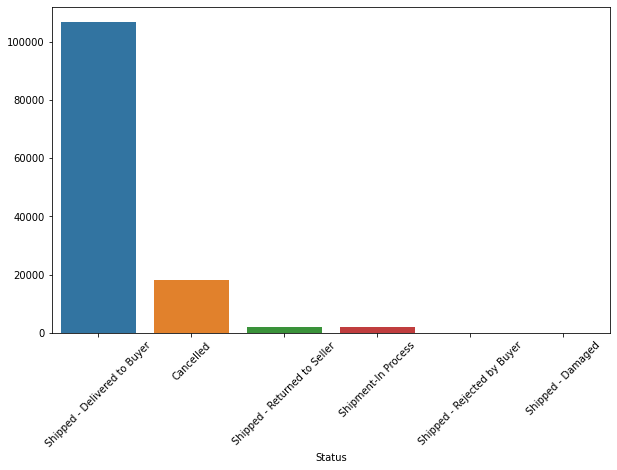

In [120]:
status=df['Status'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=status.index,y=status.values)
plt.xticks(rotation=45)
plt.show()

### Where from the above plot 1 Lakh + orders successfully shipped to the buyer,Approximately 20,000 orders are cancelled , at least 2000 orders are returened to sellers this because of any damage , Dress size is not be correct , Dress Color Change ,May be dress what they order itself may change and nearly 2000 orders are in shipment process.

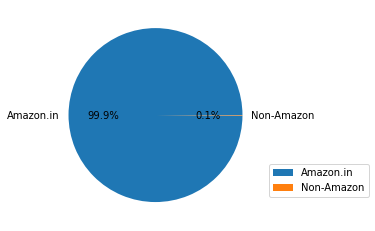

In [121]:
channel=df['Sales Channel '].value_counts()
plt.pie(x=channel.values,labels=channel.index,autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

### 99.9% All orders are directly purchased in the amazon website and 0.1% it can be redirrected to amazon websites through ads on various platforms.

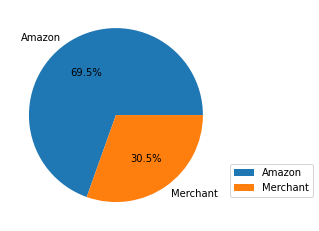

In [122]:
ful=df['Fulfilment'].value_counts()
plt.pie(x=ful.values,labels=ful.index,autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

### From the above plot we can able to see that 69.5% of goods or clothes are sold from amazon side of inventory where it has been stocked.Where 30.5% are sold by third-party ( Merchants ) due to unavailability of  stocks , they have been connected and packed on the way.

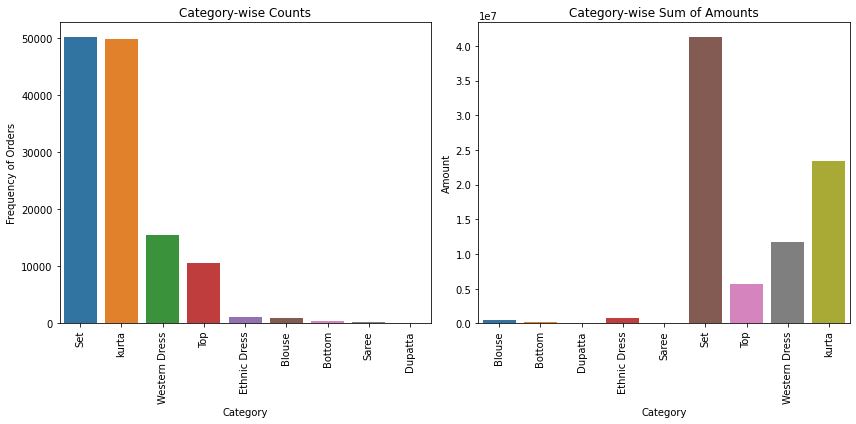

In [123]:
cat = df['Category'].value_counts()

# Category-wise sum of amounts
res = df[['Category', 'Amount']].groupby('Category').sum('Amount')
res.reset_index(inplace=True)


plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.barplot(x=cat.index, y=cat.values)
plt.xticks(rotation=90)
plt.ylabel('Frequency of Orders')
plt.title('Category-wise Counts')

plt.subplot(1, 2, 2)
sns.barplot(x=res['Category'].tolist(), y=res['Amount'].tolist())
plt.xticks(rotation=90)
plt.ylabel('Amount')
plt.xlabel('Category')
plt.title('Category-wise Sum of Amounts')


plt.tight_layout()
plt.show()

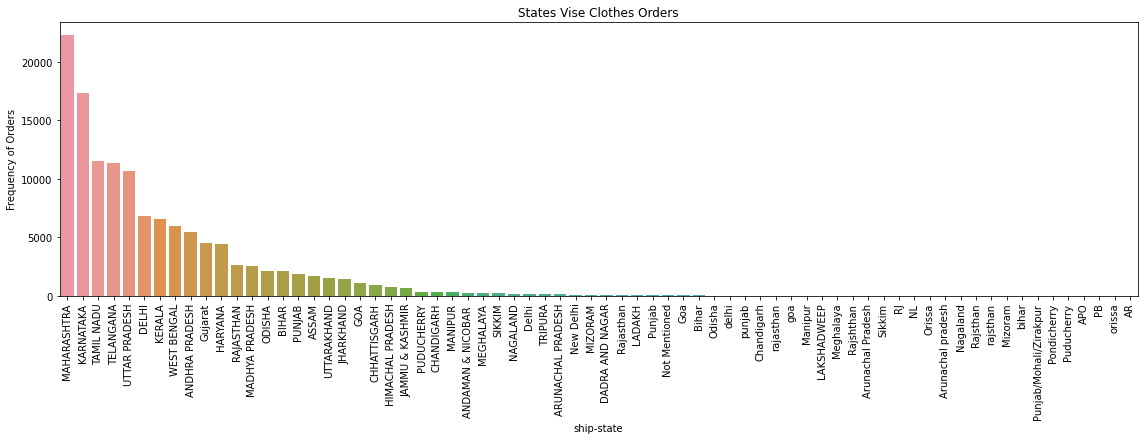

In [124]:
state=df['ship-state'].value_counts()
plt.figure(figsize=(16,6))
sns.barplot(x=state.index,y=state.values)
plt.xticks(rotation=90)
plt.ylabel('Frequency of Orders')
plt.tight_layout()
plt.title("States Vise Clothes Orders")
plt.show()

### If see from the above graph the two states Maharashtra & Karnataka where the high orders of clothes came because there two metroplolitan cities where people engagement is high one is mumbai and banagalore.Based on that we need to increase the stocks and effectively allocate the resources.

In [125]:
state_amount=df[['ship-state','Amount']].groupby('ship-state').sum('Amount').reset_index().sort_values('Amount',ascending=False)

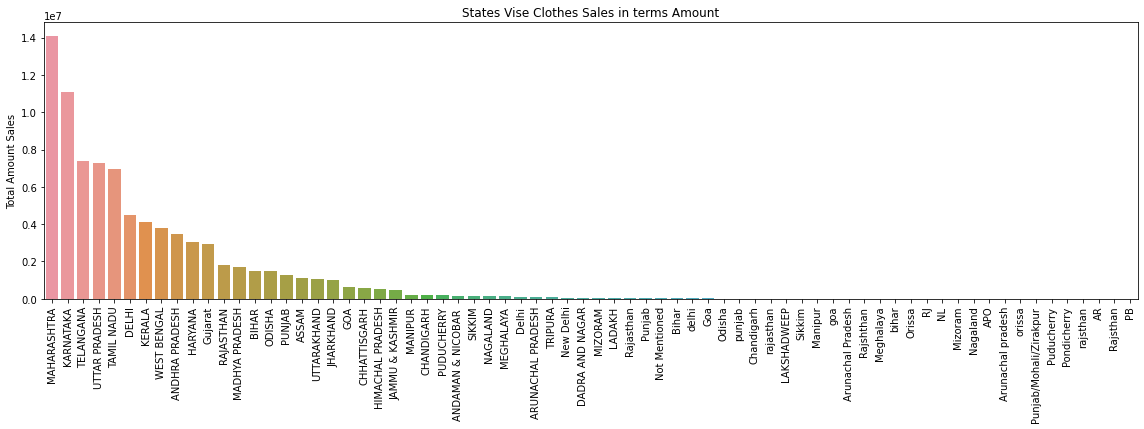

In [126]:
plt.figure(figsize=(16,6))
sns.barplot(x=state_amount['ship-state'].tolist(),y=state_amount['Amount'].tolist())
plt.xticks(rotation=90)
plt.ylabel('Total Amount Sales')
plt.tight_layout()
plt.title("States Vise Clothes Sales in terms Amount")
plt.show()

### If see from the above graph the two states Maharashtra & Karnataka where the high sales of cloths in terms of Amount  came because there two metroplolitan cities where people engagement is high one is mumbai and banagalore.Based on that we need to increase the stocks and effectively allocate the resources.

### Suprisingly if you see in third state in terms frequency of orders is Tamil Nadu and in terms total sales amount third state is Telegana.This because more than the Quantity of the cloths they order the Quality of cloths is more important . Of Course Quality of Cloths increases the Amount.

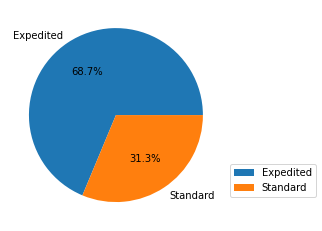

In [127]:
ses=df['ship-service-level'].value_counts()
plt.pie(x=ses.values,labels=ses.index,autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

### From the above plot we can tell that the most of time the clothes are fastly shipped(Expedited) and some times it takes business day 5-7 and more days ( Standard ).

In [128]:
df['B2B'].value_counts()

B2B
False    128104
True        871
Name: count, dtype: int64

In [129]:
# B2B space what Category of clothes they are ordering
df_B2B=df[df['B2B']==True]

In [130]:
df_B2B.shape

(871, 22)

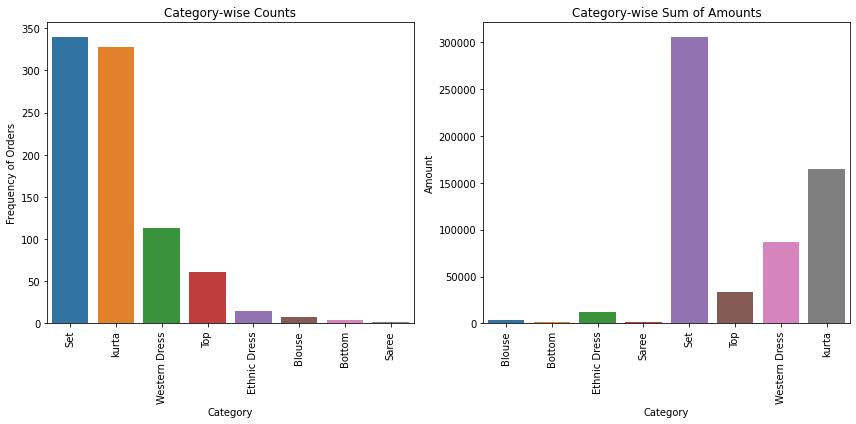

In [131]:
cat = df_B2B['Category'].value_counts()

# Category-wise sum of amounts
res = df_B2B[['Category', 'Amount']].groupby('Category').sum('Amount')
res.reset_index(inplace=True)


plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.barplot(x=cat.index, y=cat.values)
plt.xticks(rotation=90)
plt.ylabel('Frequency of Orders')
plt.title('Category-wise Counts')

plt.subplot(1, 2, 2)
sns.barplot(x=res['Category'].tolist(), y=res['Amount'].tolist())
plt.xticks(rotation=90)
plt.ylabel('Amount')
plt.xlabel('Category')
plt.title('Category-wise Sum of Amounts')


plt.tight_layout()
plt.show()

### 871 orders are ordered by business ( Business to Business ) and 128104 orders are ordered by normal Customers ( Business to Consumers)

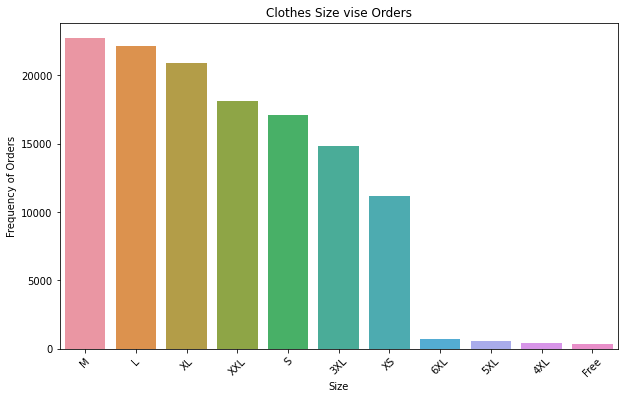

In [132]:
size=df['Size'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=size.index,y=size.values)
plt.xticks(rotation=45)
plt.title('Clothes Size vise Orders')
plt.ylabel('Frequency of Orders')
plt.show()

### Medium Size Clothes are mostly ordered followed by Large and Extra Large size Clothes , These should be more Stocked than other sizes of clothes.

In [133]:
df2=pd.read_csv('Sale Report.csv')

In [134]:
df2.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [135]:
df2.shape

(9271, 7)

In [136]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [137]:
df2.isnull().sum()

index          0
SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64

In [138]:
df2.dropna(inplace=True)

In [139]:
df2.isnull().sum().sum()

0

In [140]:
df2.columns=['index','SKU','Design No.','Stock','Categories','Size ','Color']

In [141]:
df_final=df.merge(df2,how='inner',on='SKU')

In [142]:
df_final.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-country,B2B,fulfilled-by,Month,index,Design No.,Stock,Categories,Size,Color
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,IN,False,Easy Ship,4,8978,SET389,32.0,SET,S,White
1,408-9553867-3715507,2022-04-27,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,IN,False,Easy Ship,4,8978,SET389,32.0,SET,S,White
2,408-7468849-2134719,2022-04-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,IN,False,Easy Ship,4,8978,SET389,32.0,SET,S,White
3,406-8338408-6778764,2022-04-20,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,IN,False,Easy Ship,4,8978,SET389,32.0,SET,S,White
4,405-2959500-2916317,2022-04-19,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,IN,False,Easy Ship,4,8978,SET389,32.0,SET,S,White


In [143]:
df_final.isnull().sum().sum()

0

In [144]:
cat_stock=df_final[['Category','Stock']].groupby('Category').sum('Stock').reset_index().sort_values('Stock',ascending=False)

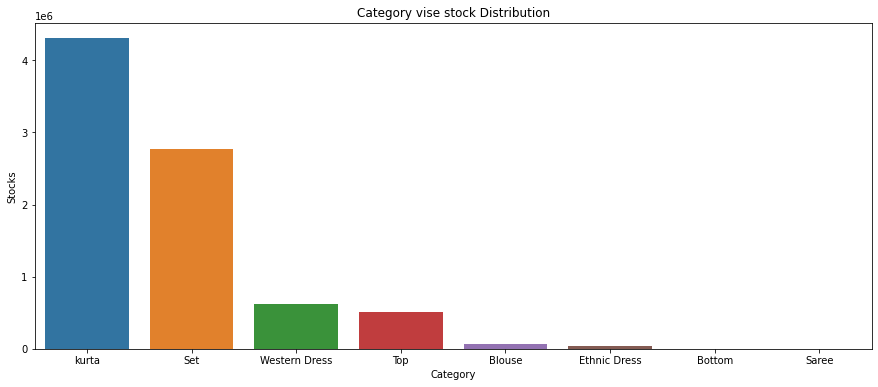

In [145]:
plt.figure(figsize=(15,6))
sns.barplot(x=cat_stock['Category'].tolist(),y=cat_stock['Stock'].tolist())
plt.xlabel('Category')
plt.ylabel('Stocks')
plt.title('Category vise stock Distribution')
plt.show()


In [146]:
df_final['Color'].unique()

array(['White', 'Green', 'Light Green', 'Blue', 'Pink', 'Gold', 'Teal',
       'Grey', 'Black', 'Cream', 'Magenta', 'Mauve', 'Light Pink', 'Red',
       'Maroon', 'Yellow', 'OFF WHITE', 'Olive Green', 'Navy Blue',
       'Mustard', 'Peach', 'Multicolor', 'Teal Green', 'TEAL BLUE ',
       'Sea Green', 'Turquoise', 'Orange', 'Turquoise Blue', 'NAVY',
       'CORAL', 'Rust', 'LIGHT YELLOW', 'Brown', 'Beige', 'TEAL GREEN ',
       'Purple', 'Wine', 'CORAL ', 'CORAL PINK', 'Turquoise Green',
       'Indigo', 'CORAL ORANGE', 'Olive', 'Dark Green', 'Light Brown',
       'Light Blue', 'Dark Blue', 'Sky Blue', 'Charcoal', 'Powder Blue',
       'LEMON ', 'LEMON', 'LIME GREEN', 'MINT GREEN', 'BURGUNDY', 'Khaki',
       'Taupe', 'Lemon Yellow', 'Chiku', 'MINT'], dtype=object)

In [147]:
len(df_final['Color'].unique())

60

In [148]:
df_final['Color'].value_counts()

Color
Blue               14271
Green              12546
Pink               11219
Mustard             8136
Black               7412
Teal                6806
Peach               6462
Maroon              4492
Light Green         4472
Grey                4038
White               3909
OFF WHITE           3564
Navy Blue           3443
Red                 3101
Orange              2995
Yellow              2587
Cream               2428
Turquoise Blue      2118
Multicolor          1616
Brown               1409
Magenta             1394
Sea Green           1350
Olive Green         1198
Light Pink           932
Gold                 929
Beige                846
Turquoise            781
Light Brown          629
Wine                 608
Olive                561
TEAL GREEN           513
Mauve                480
TEAL BLUE            442
Sky Blue             421
Rust                 398
Dark Green           361
Indigo               357
Purple               312
CORAL                306
Dark Blue          

### Where the blue color clothes are mostly ordered than other colors,Secondly Green,Thirdly Pink,Fourthly Mustard, Fiftly Black color clothes are ordered.

In [149]:
cat_count=pd.DataFrame(df_final[['Category','Color']].value_counts()).reset_index().sort_values('count',ascending=False)

In [150]:
for i in cat_count['Category'].unique():
    res=cat_count[cat_count['Category']==i]
    print(res.sort_values('count',ascending=False).iloc[0].tolist())
    

['kurta', 'Blue', 6018]
['Set', 'Pink', 5644]
['Western Dress', 'Green', 4636]
['Top', 'Red', 1415]
['Ethnic Dress', 'Mustard', 397]
['Blouse', 'Purple', 149]
['Bottom', 'Brown', 48]
['Saree', 'Pink', 37]


### The Above one Shows its the Most Customer Behaviour on Dress Category and the color mostly they order.

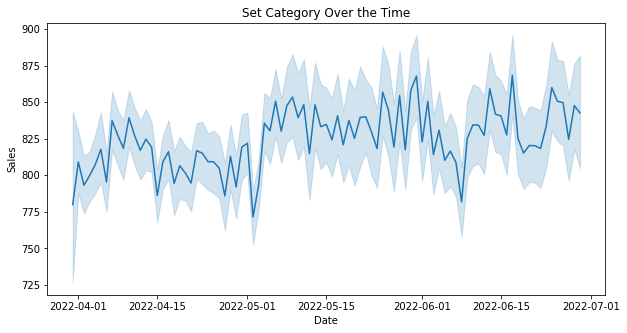

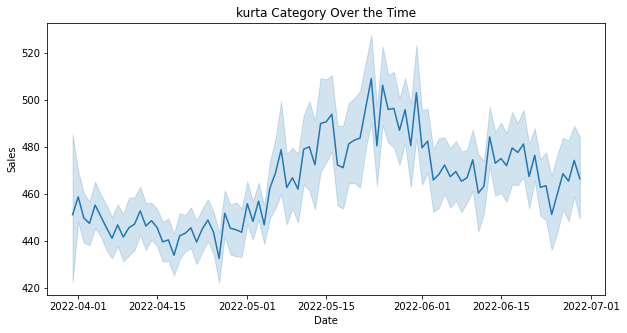

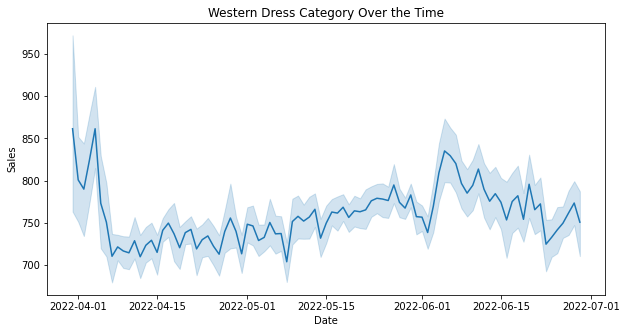

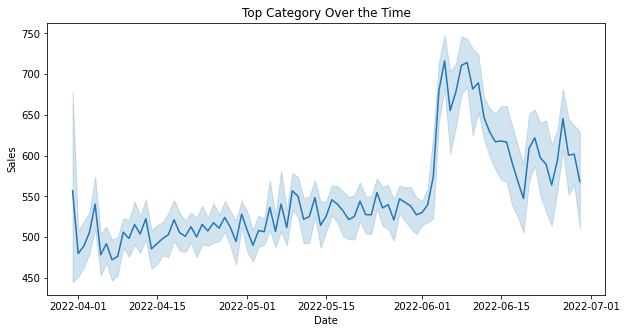

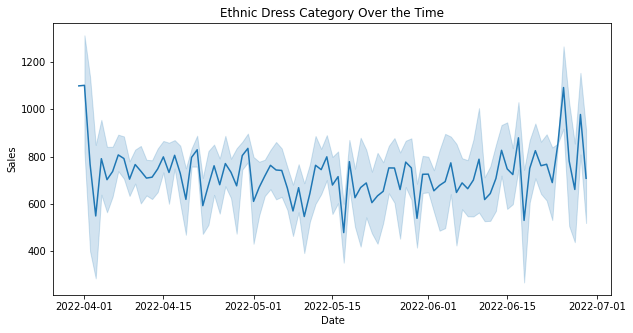

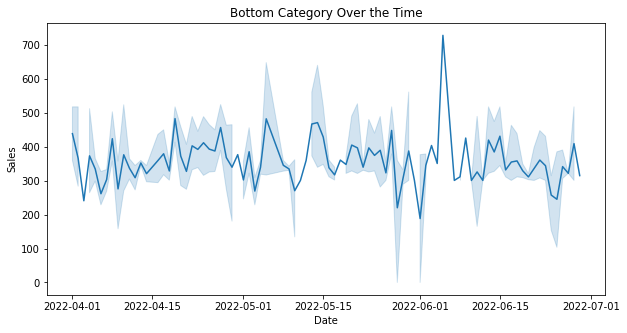

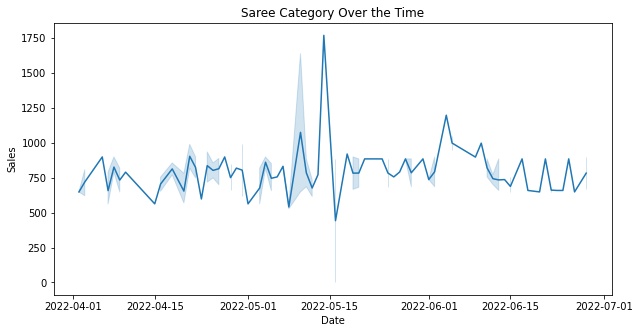

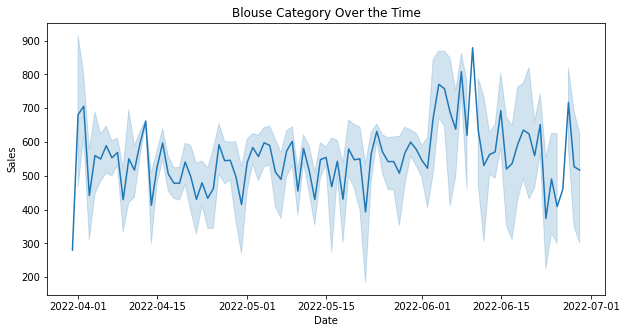

In [151]:
for cat in df_final['Category'].unique():
    res_df=df_final[df_final['Category']==cat]
    plt.figure(figsize=(10,5))
    sns.lineplot(data=res_df,x='Date',y='Amount')
    plt.title('{} Category Over the Time'.format(cat))
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
    
    

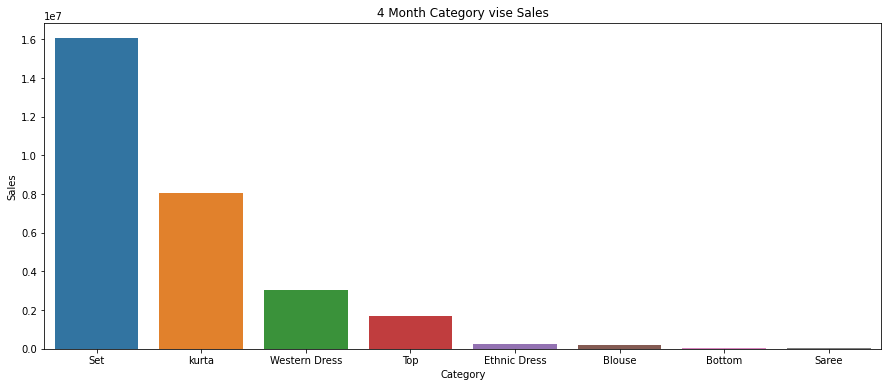

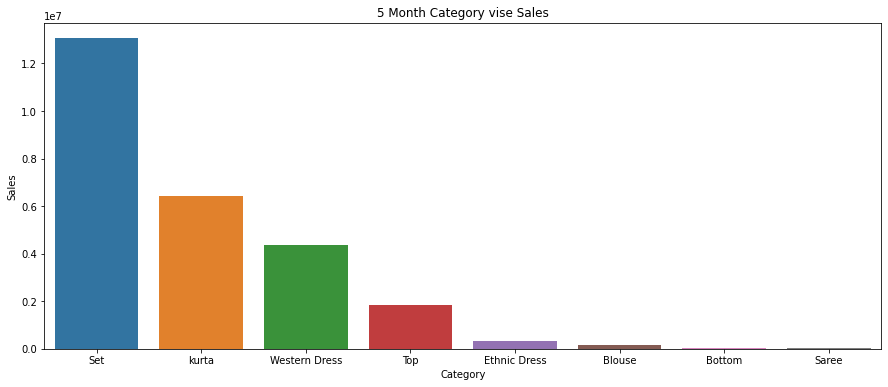

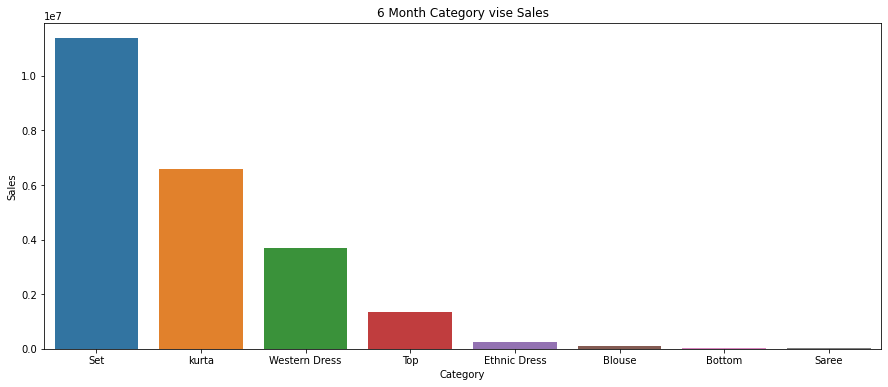

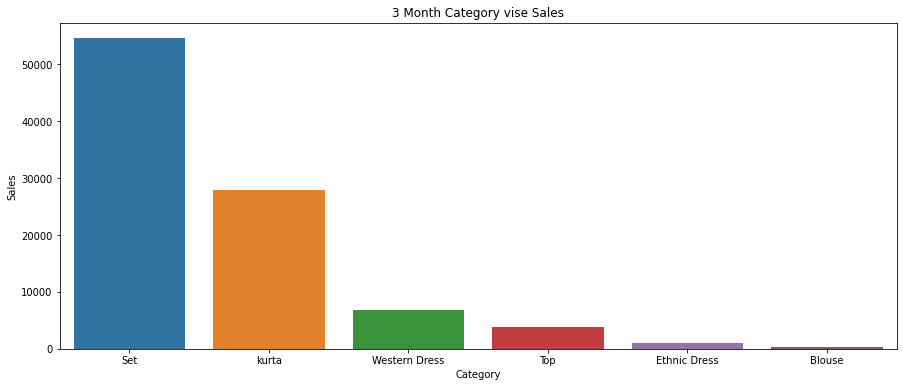

In [152]:
for month in df_final['Month'].unique():
    res_df=df_final[df_final['Month']==month]
    monthly_sales=res_df[['Category','Amount']].groupby('Category').sum('Amount').reset_index().sort_values('Amount',ascending=False)
    plt.figure(figsize=(15,6))
    sns.barplot(x=monthly_sales['Category'].tolist(),y=monthly_sales['Amount'].tolist())
    plt.xlabel('Category')
    plt.ylabel('Sales')
    plt.title('{} Month Category vise Sales'.format(month))
    plt.show()


<b> TOTAL QUANTITIES SOLD </b>

In [153]:
df['Qty'].sum()

116649

In [154]:
df_B2B['Qty'].sum()

840

In [155]:
df['Qty'].sum()-df_B2B['Qty'].sum()

115809

In [156]:
# Average Amount of Sales in B2B is Rs 700
np.round(df[df['B2B']==True]['Amount'].mean())

700.0

In [157]:
# Average Amount of Sales in B2C is Rs 648
np.round(df[df['B2B']==False]['Amount'].mean())

648.0

#### Avg Money spend by B2B ( Business to Business) - Companies or Organisation who want to buy clothes they are spending more than that of Normal Customers ( B2C - Business to Consumers).

In [158]:
month={1:'January',2:'Feburary',3:'March',4:'April',5:'May',6:'June'}

In [159]:
df_final['Month']=df_final['Month'].replace(month)

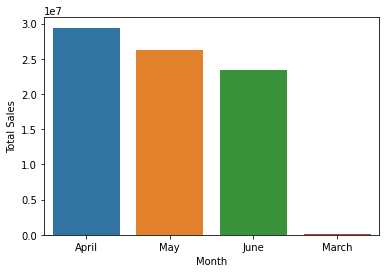

In [160]:
monthly=df_final[['Month','Amount']].groupby('Month').sum('Amount').reset_index().sort_values('Amount',ascending=False)
sns.barplot(x=monthly['Month'].tolist(),y=monthly['Amount'].tolist())
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

<b> TOTAL SALES AMOUNT </b>

In [161]:
np.round(df['Amount'].sum())

83648215.0

In [162]:
inter_df=pd.read_csv('International sale Report.csv')
inter_df.head()

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,Total_Amount
0,0,44322,01-06-2021,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,617,617
1,1,44322,01-06-2021,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,617,617
2,2,44322,01-06-2021,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,617,617
3,3,44322,01-06-2021,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,617,617
4,4,44322,01-06-2021,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,617,617


In [163]:
# International Total Sales
inter_df['Total_Amount'].sum()

16127035

In [164]:
# Total Qunatity
inter_df['PCS'].sum()

24017

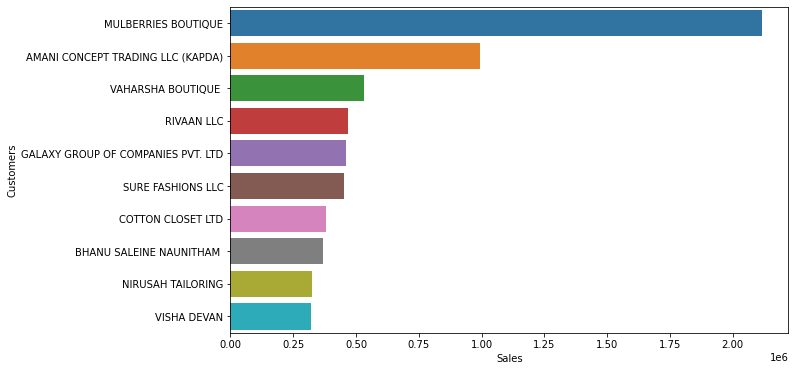

In [165]:
# Top International Customers
Top_10=inter_df[['CUSTOMER','Total_Amount']].groupby('CUSTOMER').sum('Total_Amount').reset_index().sort_values('Total_Amount',ascending=False)
Top_10_res=Top_10.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=Top_10_res['Total_Amount'].tolist(),y=Top_10_res['CUSTOMER'].tolist())
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.show()

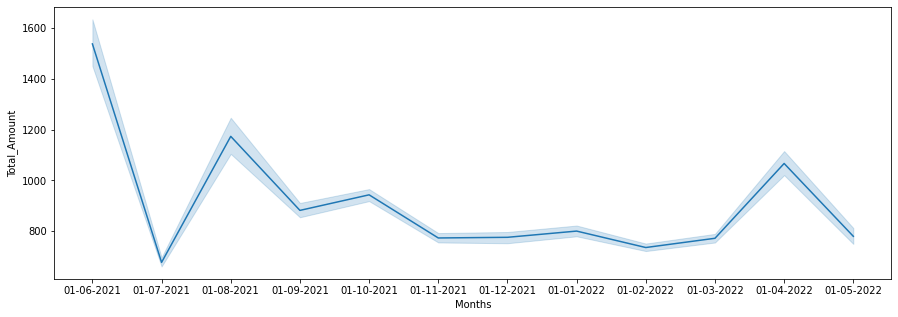

In [166]:
plt.figure(figsize=(15,5))
sns.lineplot(data=inter_df,x='Months',y='Total_Amount')
plt.show()

## Competitor Analysis

In [104]:
df_march=pd.read_csv('P  L March 2021.csv')
df_march.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [106]:
df_march.drop('index',axis=1,inplace=True)

In [108]:
df_march.shape

(1251, 16)

In [105]:
df_may=pd.read_csv('May-2022.csv')
df_may.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [107]:
df_may.drop('index',axis=1,inplace=True)

In [109]:
df_may.shape

(1251, 16)

In [110]:
df_mar_may=pd.concat([df_march,df_may],axis=0)

In [112]:
df_mar_may.head()

,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,487,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [113]:
df_mar_may.describe(include=[int])

,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
count,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000
mean,542.709432,2195.297362,2224.110312,2230.672262,2237.180655,2237.180655,2232.638689,2232.488409,2218.168665,2227.732214,2229.059153
std,227.583528,656.234583,661.973445,663.878305,659.752590,659.752590,661.043936,656.417582,647.541210,658.222655,658.461393
min,199.000000,1195.000000,254.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
25%,395.000000,1782.250000,1795.000000,1795.000000,1895.000000,1895.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
50%,462.000000,2050.000000,2097.000000,2097.000000,2150.000000,2150.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000
75%,615.000000,2378.000000,2395.000000,2395.000000,2495.000000,2495.000000,2397.000000,2397.000000,2395.000000,2395.000000,2397.000000
max,2095.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000


In [130]:
l=['Category','Ajio MRP','Amazon MRP','Amazon FBA MRP','Flipkart MRP','Limeroad MRP','Myntra MRP','Paytm MRP','Snapdeal MRP']
res=df_mar_may[l].groupby('Category').mean().reset_index().round()

In [144]:
res

,Category,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,Gown,3151.0,3151.0,3151.0,3151.0,3151.0,3151.0,3151.0,3151.0
1,Kurta,1994.0,2009.0,2009.0,2003.0,2004.0,1995.0,1997.0,1999.0
2,Kurta Set,2757.0,2744.0,2744.0,2744.0,2742.0,2713.0,2742.0,2742.0
3,Tops,1751.0,1751.0,1751.0,1739.0,1728.0,1729.0,1728.0,1728.0


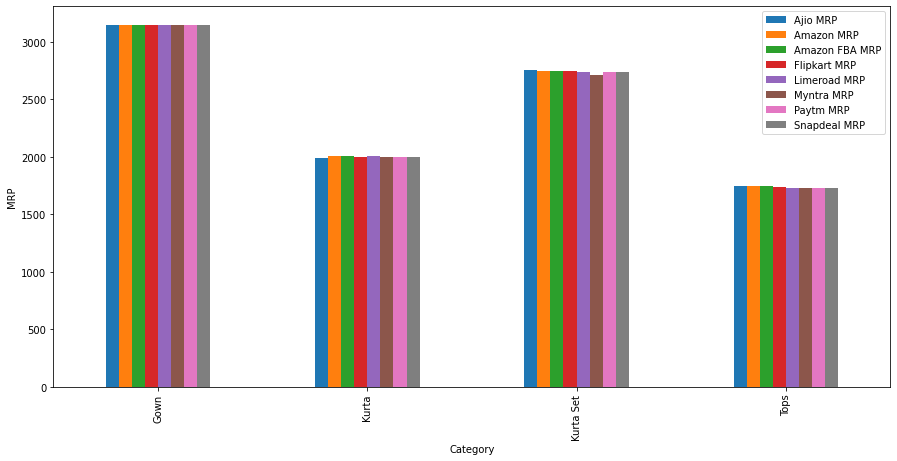

In [140]:
res.plot(kind='bar',x='Category',figsize=(15,7))
plt.ylabel('MRP')
plt.show()

In [142]:
for i in l[1:]:
    print('{} Average Prices across all category : {}'.format(i,res[i].mean()))

Ajio MRP Average Prices across all category : 2413.25
Amazon MRP Average Prices across all category : 2413.75
Amazon FBA MRP Average Prices across all category : 2413.75
Flipkart MRP Average Prices across all category : 2409.25
Limeroad MRP Average Prices across all category : 2406.25
Myntra MRP Average Prices across all category : 2397.0
Paytm MRP Average Prices across all category : 2404.5
Snapdeal MRP Average Prices across all category : 2405.0


In [145]:
df_mar_may[l[1:]].mean()

Ajio MRP          2230.672262
Amazon MRP        2237.180655
Amazon FBA MRP    2237.180655
Flipkart MRP      2232.638689
Limeroad MRP      2232.488409
Myntra MRP        2218.168665
Paytm MRP         2227.732214
Snapdeal MRP      2229.059153
dtype: float64

In [146]:
df_mar_may[l[1:]].mode()

,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,1895,1895,1895,1895,1895,1895,1895,1695


In [151]:
df_mar_may['Catalog'].value_counts()

Catalog
Mix            1648
Surmaya         384
Colors-8         96
Rozana           96
Colors-7         86
Moments          72
Breeze-4         72
Four Gems 2      48
Name: count, dtype: int64

In [152]:
l=['Catalog','Ajio MRP','Amazon MRP','Amazon FBA MRP','Flipkart MRP','Limeroad MRP','Myntra MRP','Paytm MRP','Snapdeal MRP']
res=df_mar_may[l].groupby('Catalog').mean().reset_index().round()

In [153]:
res

,Catalog,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,Breeze-4,2195.0,2195.0,2195.0,2195.0,2195.0,2195.0,2195.0,2195.0
1,Colors-7,1595.0,1595.0,1595.0,1595.0,1595.0,1595.0,1595.0,1595.0
2,Colors-8,1895.0,1895.0,1895.0,1895.0,1895.0,1895.0,1895.0,1895.0
3,Four Gems 2,2995.0,2795.0,2795.0,2795.0,2795.0,2795.0,2795.0,2795.0
4,Mix,2172.0,2188.0,2188.0,2181.0,2181.0,2159.0,2174.0,2176.0
5,Moments,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
6,Rozana,2495.0,2495.0,2495.0,2495.0,2495.0,2495.0,2495.0,2495.0
7,Surmaya,2540.0,2540.0,2540.0,2540.0,2540.0,2540.0,2540.0,2540.0


### Overall , If You see Myntra has been selling the goods afforadably than others Ecommerce orgs.

### After Myntra , Snapdeal & Paytm are good to see.